#Assignment - 1 Machine Learning

###Group 40

####Team Members :

    2019AH04013 - N S S R S R Srikar

    2019AH04014 - Sachin S Rai

    2019AH04075 - Borusu Naga Srimouli

# Problem statement: 

---



We'll use the Bank Authentication Data Set from the UCI repository.Where class indicates whether or not a Bank Note was authentic.

Data set available at : https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt


**Tasks involved:**

1. Import the data from Bank Authentication Data Set (Links to an external site.) after converting text file into CSV and also name the column as per the sequence of the attribute information (1 point)
2.Consider all columns as independent variables and assign to variable X except the last column and consider the last column as the dependent variable and assign to variable y. Remove columns which don’t help the problem statement. (1 point)
3.Print some basic statistical details like percentile, mean, standard deviation of dataset (1 point)
4.Create a Countplot of the Classes (1 point)
5.Do Feature Scaling on Independent variables (2 points)
6.Split the data into train and test dataset (1 point)
Use sklearn library to train on train dataset on Decision Tree and predict on test dataset  (3 points)
7.Compute the accuracy and confusion matrix. (2 points)

Ignoring any warnings during package imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

#Task-1 : Importing the data

##a) Importing the data from website

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt

--2020-10-25 18:06:54--  https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46400 (45K) [application/x-httpd-php]
Saving to: ‘data_banknote_authentication.txt’

data_banknote_authe 100%[===================>]  45.31K  --.-KB/s    in 0.1s    

2020-10-25 18:06:54 (440 KB/s) - ‘data_banknote_authentication.txt’ saved [46400/46400]



##b) Converting .TXT file to .CSV file and naming the columns as per sequence

    Attribute information from the data source :
      1. variance of Wavelet Transformed image (continuous) -> Variance 
      2. skewness of Wavelet Transformed image (continuous) -> Skewness
      3. curtosis of Wavelet Transformed image (continuous) -> Curtosis
      4. entropy of image (continuous)                      -> Entropy
      5. class (integer)                                    -> Class

In [3]:
import csv 


with open('data_banknote_authentication.txt', 'r') as txt_file:
  stripped_data = (line.strip() for line in txt_file)
  lines = (line.split(",") for line in stripped_data if line)
  with open('Bank_note_auth_data.csv','w') as csv_file:
    try:
      csv_out = csv.writer(csv_file)
      csv_out.writerow(('Variance','Skewness','Curtosis','Entropy','Class'))
      csv_out.writerows(lines)
    except:
      print('error in writing the file')
txt_file.close()
csv_file.close()

#Task-2 : Preparing the data for analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [5]:
bnk_noteDF = pd.read_csv('Bank_note_auth_data.csv')
Correlation_threshold = 0.80

## a) Visualising Relationships

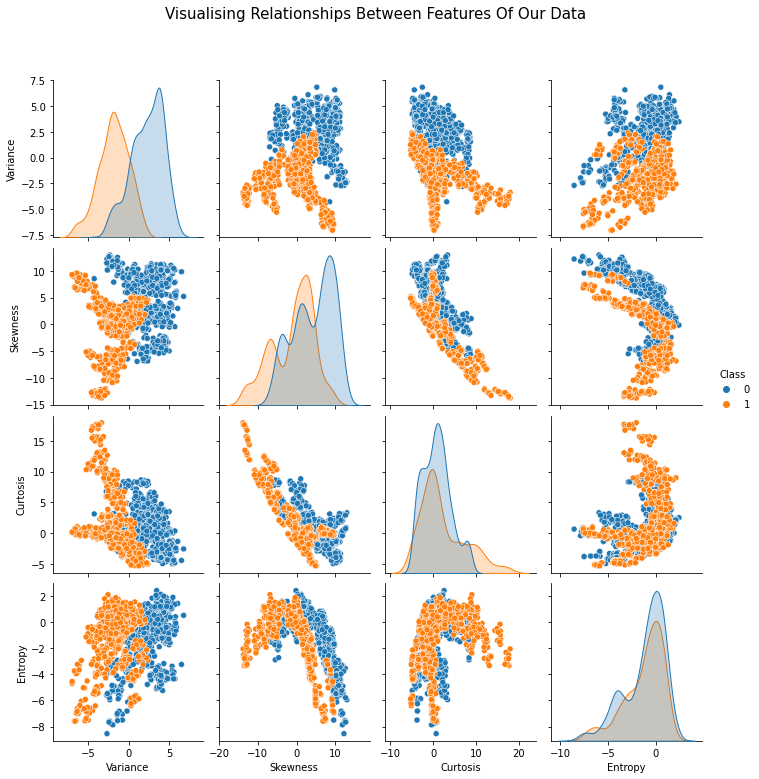

In [6]:
fig_title  = "Visualising Relationships Between Features Of Our Data"
plot = sns.pairplot(bnk_noteDF,hue='Class')
plot.fig.suptitle(fig_title, y=1.08, fontsize=15)
plt.show()

## b)Data Analysis to remove any unneeded columns


In [7]:
#Function to check empty Values
def NaN_percent(df, column_name):
    row_count = df[column_name].shape[0]
    empty_values = row_count - df[column_name].count()
    return (100.0*empty_values)/row_count


In [8]:
for i in list(bnk_noteDF):
    print(i +': ' + str(NaN_percent(bnk_noteDF,i))+'%')

Variance: 0.0%
Skewness: 0.0%
Curtosis: 0.0%
Entropy: 0.0%
Class: 0.0%


In [9]:
bnk_noteDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [10]:
bnk_noteDF.isna().value_counts() 

Variance  Skewness  Curtosis  Entropy  Class
False     False     False     False    False    1372
dtype: int64

In [11]:
bnk_noteDF.isnull().value_counts()

Variance  Skewness  Curtosis  Entropy  Class
False     False     False     False    False    1372
dtype: int64

In [12]:
independent_vars = bnk_noteDF.iloc[:,:-1]
dependent_var = bnk_noteDF.iloc[:,-1:]

## c)Correlation Analysis

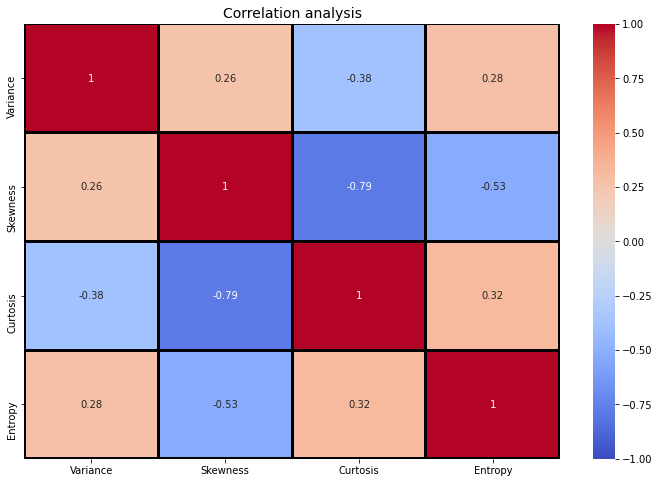

In [13]:
fig_title = "Correlation analysis"
sns.heatmap(independent_vars.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=2, linecolor='black')
plt.title(fig_title, fontsize = 14)
plt.show()

From the below analysis of correlation heat map we don't find any column which appears as not needed and also we don't have any missing values in any of the columns so we've not removed any column

###d)Remove any unneeded column(s)

In [14]:
# Create correlation matrix
corr_matrix = independent_vars.corr().abs()

# Select upper triangle of correlation matrix and find features with correlation greater than 0.75
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > Correlation_threshold)]
if len(to_drop) > 0:
  print('We can remove ' + str(to_drop) + ' these columns as it has crossed the threshold')
else:
  print('We need not remove any column as the correlation values havenot crossed the defined threshold -> ' + str(Correlation_threshold))

# Drop features 
independent_vars = independent_vars.drop(to_drop, axis=1)

We need not remove any column as the correlation values havenot crossed the defined threshold -> 0.8


From the above correlation analysis it appears that all columns are below the defined correlation limit = 0.80 [ we have choosen this value as 0.80 = 4/5 of dataset as no pre-determined value has been provided in the question]

 Hence we haven't removed any column

In [15]:
independent_vars.head()

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


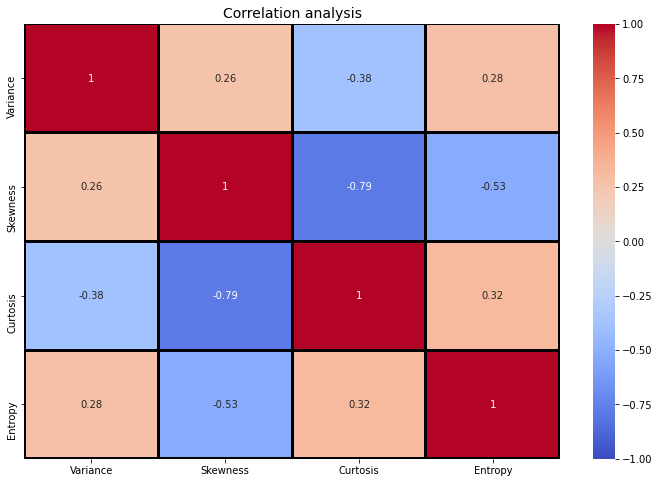

In [16]:
fig_title = "Correlation analysis"
sns.heatmap(independent_vars.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=2, linecolor='black')
plt.title(fig_title, fontsize = 14)
plt.show()

#Task-3 : Statistics of the data

In [17]:
bnk_noteDF.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


#Task-4 : Countplot of classes

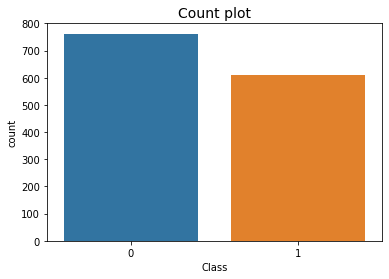

In [18]:
fig_title = 'Count plot'
plt.rcParams['figure.figsize'] = (6,4)
sns.countplot(x='Class', data = bnk_noteDF)
plt.title(fig_title, fontsize = 14)
plt.show()

In [19]:
bnk_noteDF['Class'].value_counts()

0    762
1    610
Name: Class, dtype: int64

## a)Balancing the classes

Looking at the above results its evident that the data isn't balanced. And as we are looking to develop a predictive model using a decision tree which is ideally more biased towards predicting the class which has higher number of instances we need to bring a balance to the classes so as to develop a unbiased model. 

So we're using the over-sampling technique to bring the balance between the classes. Over-Sampling increases the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample. This is done in order to obtain approximately the same number of instances for both the classes. 

In [20]:
from sklearn.utils import resample,shuffle

In [21]:
bnk_noteDF = bnk_noteDF.drop(to_drop, axis=1)

In [22]:
bnk_noteDF.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [23]:
class_0DF = bnk_noteDF[bnk_noteDF['Class'] == 0] #Majority values
class_1DF = bnk_noteDF[bnk_noteDF['Class'] == 1] #Minority values
min_df_unsampled = resample(class_1DF,replace=True,n_samples=762,random_state = 123)
bnk_noteDF_balanced = pd.concat([min_df_unsampled,class_0DF])
bnk_noteDF_balanced = shuffle(bnk_noteDF_balanced)
bnk_noteDF_balanced['Class'].value_counts()

1    762
0    762
Name: Class, dtype: int64

## b)Correlation analysis after balancing the classes

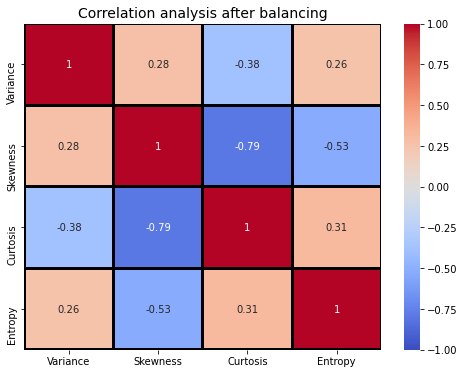

In [24]:
plt.rcParams['figure.figsize'] = (8,6)
fig_title = 'Correlation analysis after balancing'
independent_vars_balanced = bnk_noteDF_balanced.iloc[:,:-1]
dependent_var_balanced = bnk_noteDF_balanced.iloc[:,-1:]
sns.heatmap(independent_vars_balanced.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=2, linecolor='black')
plt.title(fig_title, fontsize = 14)
plt.show()

With balancing there hasn't been much change in the correlation values

#Task - 5 : Feature Scaling

Importing modules

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(independent_vars_balanced)

#Task - 6 : Splitting data  and building Decision Tree Model 

##a) Splitting the data

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [28]:
#Train - Test Split
x_train,x_test,y_train,y_test = train_test_split(independent_vars_balanced,dependent_var_balanced,test_size = 0.2, random_state=42)

#Train - Validation Split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.25, random_state=120)

##b)Decision Tree Model

In [29]:
tree = DecisionTreeClassifier(random_state= 123, criterion="entropy")

In [30]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [31]:
y_val_predict =  tree.predict(x_val) #Predicting the accuracy on validation data

In [32]:
y_predict = tree.predict(x_test) #Predicting the accuracy on test data

#Task - 7 : Model Evaluation

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

In [34]:
plt.rcParams['figure.figsize'] = (4,2)

def ModelMetrics(df_1,df_2, type):
  print('Accuracy Score: \n')
  print('On {} data {}'.format(type,accuracy_score(df_1,df_2)*100))
  print('\n')

  print('Classification report for {} data: \n'.format(type))
  print(classification_report(df_1,df_2))
  print('\n')

  #print('Confusion Matrix for {} data:\n'.format(type))
  fig_title = 'Confusion Matrix for ' + type + ' data'
  sns.heatmap(confusion_matrix(df_1,df_2),annot=True,cmap='Oranges', fmt='g')
  plt.title(fig_title, fontsize = 14)
  plt.tight_layout()
  plt.show()    


## a) Evaluating model on validation data

Accuracy Score: 

On Validation data 99.672131147541


Classification report for Validation data: 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       156
           1       0.99      1.00      1.00       149

    accuracy                           1.00       305
   macro avg       1.00      1.00      1.00       305
weighted avg       1.00      1.00      1.00       305





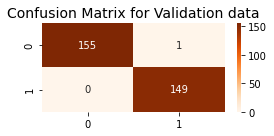

In [35]:
ModelMetrics(y_val,y_val_predict,'Validation')

## b)Evaluating model on test data

Accuracy Score: 

On Test data 97.70491803278688


Classification report for Test data: 

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       145
           1       0.98      0.98      0.98       160

    accuracy                           0.98       305
   macro avg       0.98      0.98      0.98       305
weighted avg       0.98      0.98      0.98       305





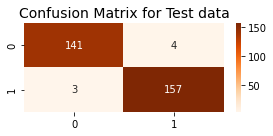

In [36]:
ModelMetrics(y_test,y_predict,'Test')

## c)Cross Validation Score

In [37]:
cv_score=cross_val_score(tree,independent_vars_balanced,dependent_var_balanced,cv=5)
print('Cross validation score = {}'.format((100*cv_score.mean()).round(2)))

Cross validation score = 99.02


#Visualising the decision tree

In [38]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

## a)Function for visualising Decision tree

In [39]:
def Display_DTree(tree_object):
  dot_data = StringIO()
  features = independent_vars_balanced.columns
  classes = ['0','1']

  export_graphviz(tree_object, out_file=dot_data,feature_names=features,class_names=classes,
                  filled=True, rounded=True,
                  special_characters=True)

  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
  return Image(graph.create_png())

## b)Decision tree

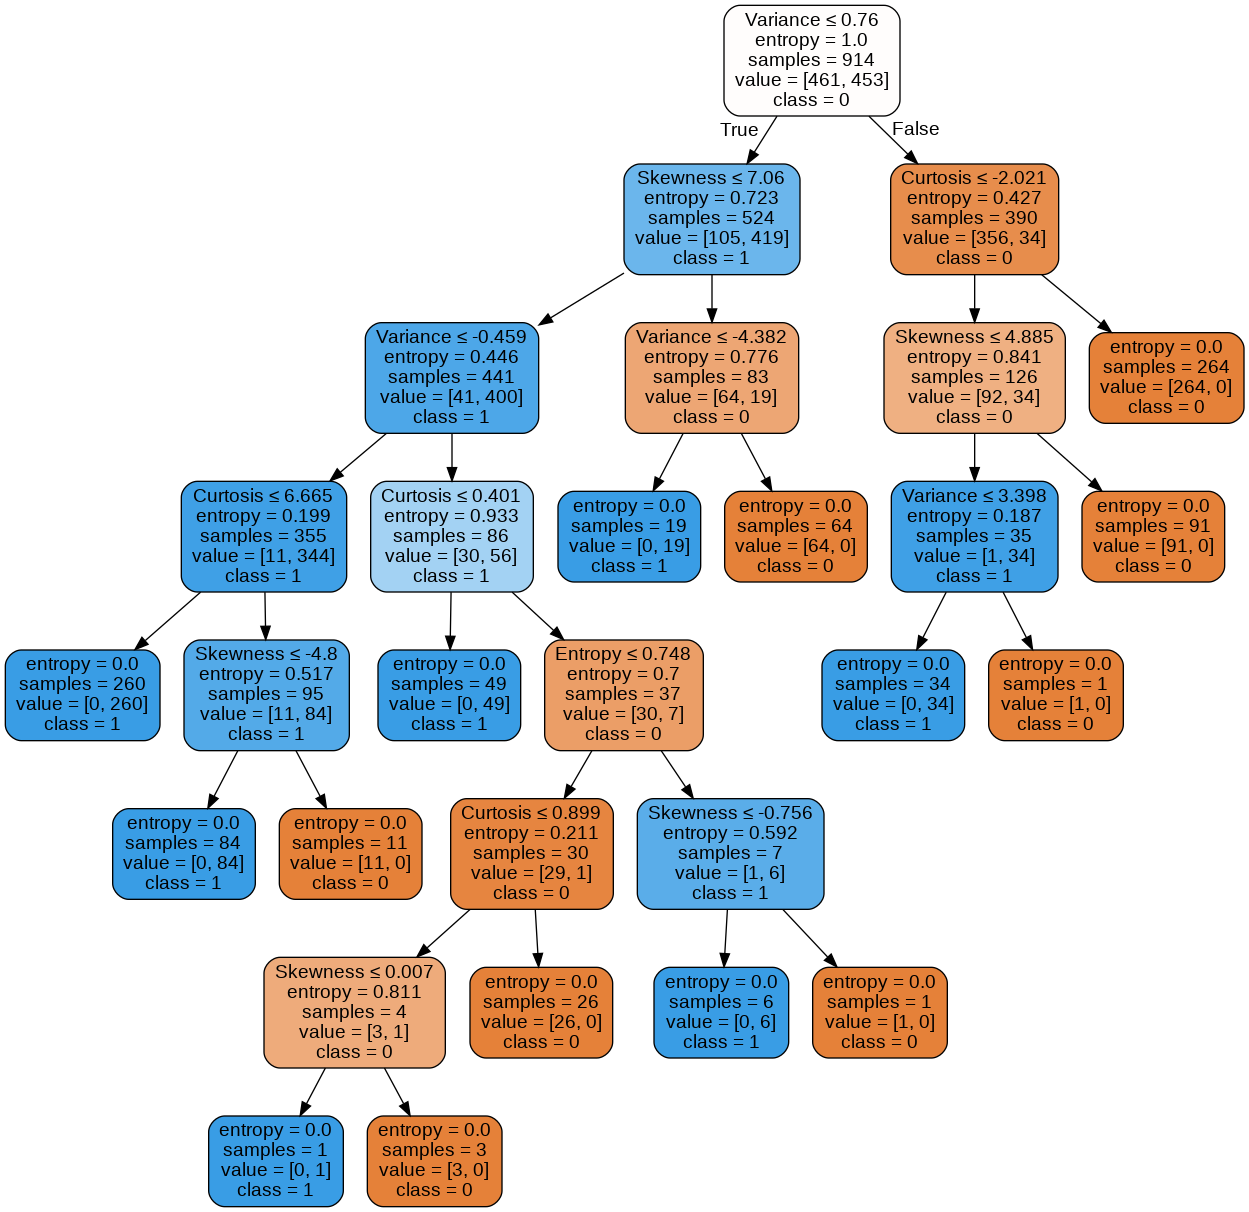

In [40]:
Display_DTree(tree)

#Extra Mile

##Tree Pruning

### a)Analysis for pruning

In [41]:
path = tree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas

In [42]:
clfs = []
for ccp_alpha in ccp_alphas:
    Prunned_tree = DecisionTreeClassifier(criterion="entropy",random_state=42, ccp_alpha=ccp_alpha)
    Prunned_tree.fit(x_train, y_train)
    clfs.append(Prunned_tree)

In [43]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [Prunned_tree.tree_.node_count for Prunned_tree in clfs]
depth = [Prunned_tree.tree_.max_depth for clf in clfs]

In [44]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(x_train)
    y_test_pred = c.predict(x_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

In [45]:
plt.rcParams['figure.figsize'] = (6,4)

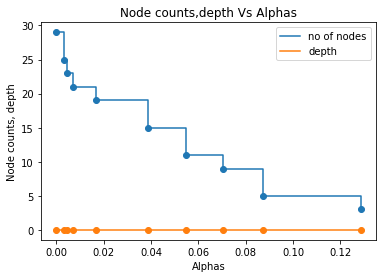

In [46]:
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.title('Node counts,depth Vs Alphas')
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.xlabel('Alphas')
plt.ylabel('Node counts, depth')
plt.legend()
plt.show()

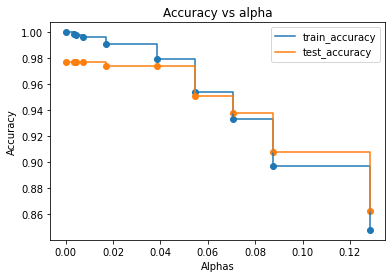

In [47]:
plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.xlabel('Alphas')
plt.ylabel('Accuracy')
plt.show()

### b) Prunned Decision tree model

In [48]:
clf_ = DecisionTreeClassifier(random_state=42,ccp_alpha=0.03,criterion='entropy')
clf_.fit(x_train,y_train)
y_train_pred = clf_.predict(x_train)
y_test_pred = clf_.predict(x_test)

### c)Model Metrics

Accuracy Score: 

On Pruned_DecisionTree_on_Training_Data data 99.12472647702407


Classification report for Pruned_DecisionTree_on_Training_Data data: 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       467
           1       0.98      1.00      0.99       447

    accuracy                           0.99       914
   macro avg       0.99      0.99      0.99       914
weighted avg       0.99      0.99      0.99       914





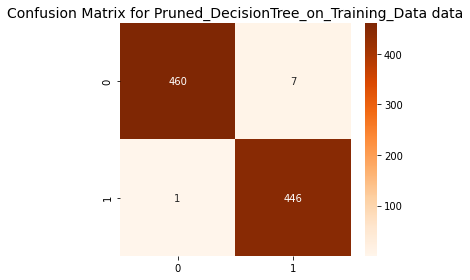

In [49]:
ModelMetrics(y_train_pred,y_train,'Pruned_DecisionTree_on_Training_Data')

Accuracy Score: 

On Pruned_DecisionTree_on_Test_Data data 97.37704918032787


Classification report for Pruned_DecisionTree_on_Test_Data data: 

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       147
           1       0.97      0.98      0.97       158

    accuracy                           0.97       305
   macro avg       0.97      0.97      0.97       305
weighted avg       0.97      0.97      0.97       305





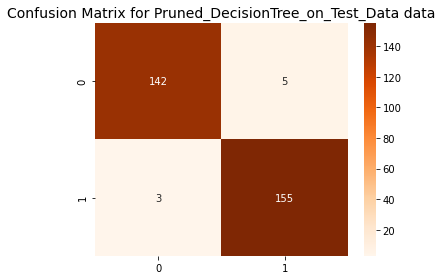

In [50]:
ModelMetrics(y_test_pred,y_test,'Pruned_DecisionTree_on_Test_Data')

### d)Pruned tree visualisation

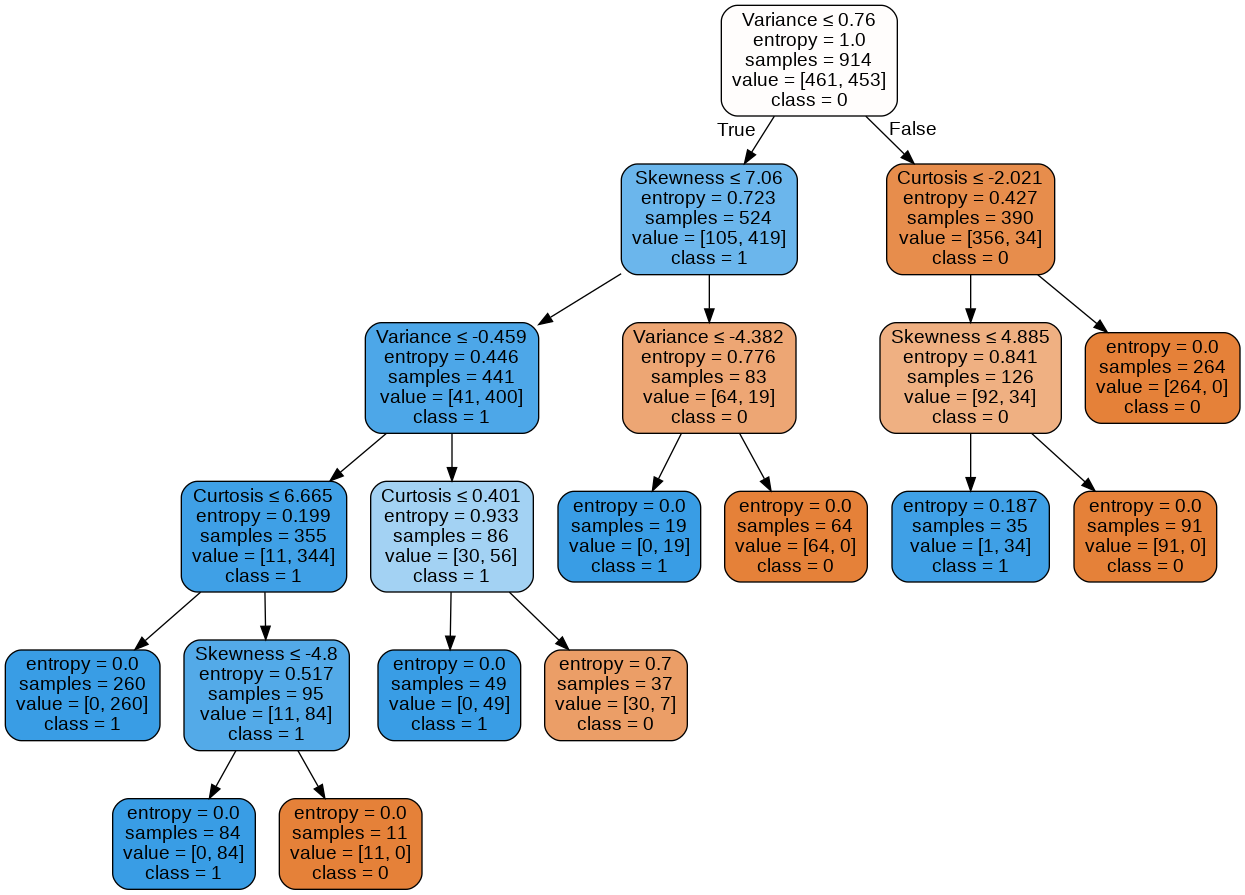

In [51]:
Display_DTree(clf_)

##Pipeline

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [53]:
my_pipeline= Pipeline([('scaler',MinMaxScaler()),('tree',DecisionTreeClassifier(criterion="gini"))])
my_pipeline.fit(x_train,y_train)
pred = my_pipeline.predict(x_test)

### a)Evaluating Pipeline

Accuracy Score: 

On using Pipeline data 99.34426229508196


Classification report for using Pipeline data: 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       145
           1       0.99      1.00      0.99       160

    accuracy                           0.99       305
   macro avg       0.99      0.99      0.99       305
weighted avg       0.99      0.99      0.99       305





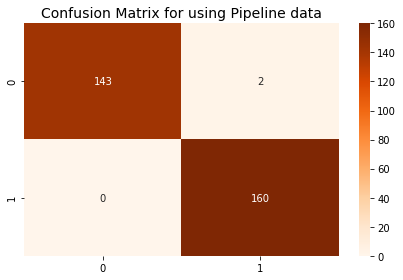

In [54]:
ModelMetrics(y_test,pred,'using Pipeline')

### b)Cross Validation score

In [55]:
cv_score1=cross_val_score(my_pipeline,independent_vars_balanced,dependent_var_balanced,cv=5)
print('Cross Validation score = {}'.format((100*cv_score1.mean()).round(2)))

Cross Validation score = 98.88
